# #탐색적 데이터 분석

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from yellowbrick.cluster.elbow import kelbow_visualizer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)
#pd.reset_option('all')
#pd.set_option('float_format', '{:.2f}'.format)

In [11]:
# ver.3
df_ver3 = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/after_cleansing/통합본/6. real_final_dataset/real_fin_dataset(ver.3)(24.04.18).csv', index_col=0)

# for streamlit dataset
df_ver3_info = df_ver3[['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Review_score', 'Time', 'sentiment']]

In [4]:
# ver.4
df_anal = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/after_cleansing/통합본/6. real_final_dataset/real_fin_dataset(ver.4)(24.04.18)(review_counts, review_score, slope만 스케일링).csv', index_col=0)

In [6]:
# ver.5
df_anal = pd.read_csv('N:/개인/DA/내배캠/5. 최종 프로젝트/after_cleansing/통합본/6. real_final_dataset/real_fin_dataset(ver.5)(24.04.18)(sentiment 제외 모두 스케일링).csv', index_col=0)

In [5]:
# 최종 선정 컬럼
df_anal = df_anal[['Review_score', 'bread', 'beverage', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats',\
     'special_menu', 'photo', 'good_music', 'reservation_possible', 'beautiful_interior', 'price', 'wait']]

In [12]:
df_ver3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15227 entries, 0 to 15226
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              15227 non-null  object 
 1   Number                15227 non-null  int64  
 2   Store                 15227 non-null  object 
 3   Address               15227 non-null  object 
 4   Addr                  15227 non-null  object 
 5   Review_score          15227 non-null  float64
 6   Review_counts         15227 non-null  int64  
 7   ID                    15227 non-null  object 
 8   Date                  15227 non-null  object 
 9   Review_text           15227 non-null  object 
 10  Time                  15227 non-null  object 
 11  slope                 15227 non-null  float64
 12  bread                 15227 non-null  float64
 13  beverage              15227 non-null  float64
 14  vegan                 15227 non-null  float64
 15  no_senior          

In [6]:
df_anal

,Review_score,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
0,-0.041896,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.041896,10.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.041896,0.0,-50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.041896,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.041896,10.0,0.0,0,0,0,100,0,0,0,0,0,0,0,0,0,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,0.266992,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15223,0.266992,100.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15224,0.266992,50.0,0.0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,50,0
15225,0.266992,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA

In [142]:
df_ver3.drop(['Platform', 'Number', 'Store', 'Address', 'Addr', 'ID', 'Date', 'Review_text', 'Review_counts', 'Time', 'bread_name', 'slope', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat', 'unique_concept', 'health', 'sentiment'], axis=1, inplace=True)
df_ver3

,Review_score,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
0,4.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.3,10.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.3,0.0,-50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,10.0,0.0,0,0,0,100,0,0,0,0,0,0,0,0,0,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15223,4.4,100.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15224,4.4,50.0,0.0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,50,0
15225,4.4,50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
df_ver3.describe()

,Review_score,Review_counts,bread,beverage,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,beautiful_interior,price,wait
count,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.00000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000,15227.000000
mean,4.313563,1227.422736,33.668155,12.556643,2.142904,6.593551,5.012806,1.163066,0.216720,0.00000,2.326131,0.661982,0.495173,0.130164,0.604847,0.243646,0.228541,3.404479,-0.725750,-0.723058
std,0.323753,2254.198131,44.333654,28.975422,13.617316,23.581534,26.860891,14.315463,7.412012,8.10009,15.478719,9.483153,9.262920,3.375023,8.418677,5.303083,5.149828,15.949957,18.899804,7.324007
min,2.000000,1.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-100.000000,-50.000000,-100.000000,-100.000000
25%,4.300000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.390000,413.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.430000,1411.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,20194.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### 컬럼별 분포 확인

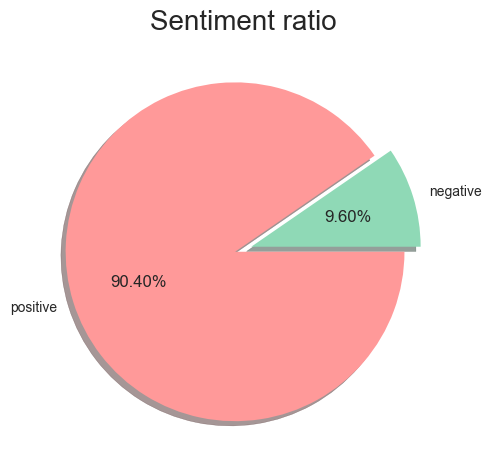

In [92]:
# sentiment
positive = len(df_ver3[df_ver3['sentiment'] == 1]) / len(df_ver3['sentiment'])
negative = len(df_ver3[df_ver3['sentiment'] == 0]) / len(df_ver3['sentiment'])
ratio = [positive, negative]
labels = ['positive', 'negative']
explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.title("Sentiment ratio", fontsize=20)
plt.pie(ratio, labels=labels, autopct='%.2f%%', counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

##### 컬럼 삭제 이유

'Review_score', 'bread', 'beverage', 'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking', 'spacious_store', 'plenty_seats', 'comfortable_seats',
'special_menu', 'photo', 'good_music', 'reservation_possible', 'beautiful_interior', 'price', 'wait'

 - **sentiment** : 다른 컬럼들과 상대적으로 상관관계 높아서
 - **vegan, no_senior, no_kids, pet, whole_wheat, health, unique_concept** : 특성이 명확하지 않아서(why? 데이터가 소량 수집되어서)
 - **slope** : 고지대에 위치한 곳은 풍경이 좋은 곳과 연관이 있을 것으로 생각하여 넣었으나 최대 경사도가 12도밖에 되지 않아 유의미한 결과를 확인할 수 없을 것으로 판단돼서
 - **Review_score** : review_counts보다는 review_score가 더 영향을 많이 미칠 것으로 판단되어 review_counts 제거 후 차원 축소 진행했고, 컬럼 제거 전후 차이 없었음

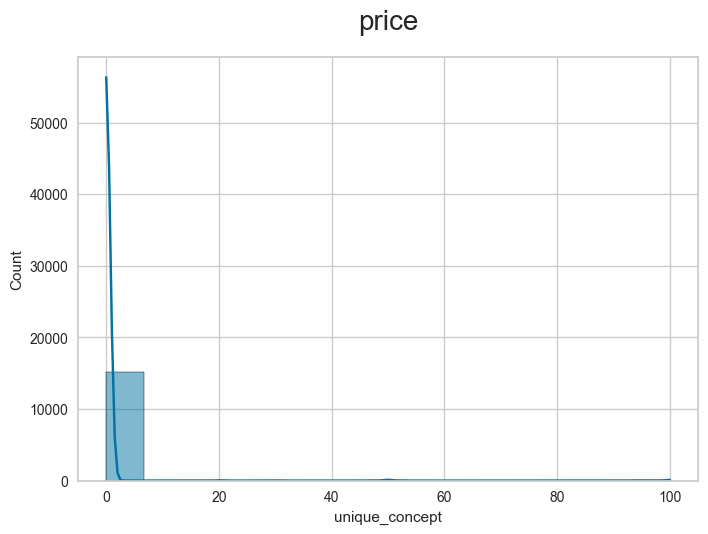

In [231]:
plt.title("price", fontsize=20, pad=20)
sns.histplot(data = df_ver3, x='unique_concept', kde=True)
plt.show()

### 컬럼별 0값 제거한 상태에서의 분포 확인

c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


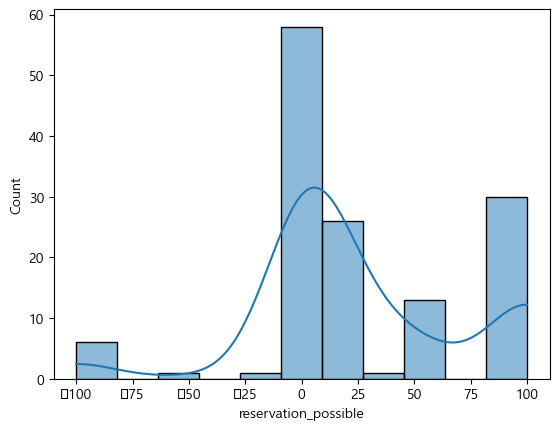

In [193]:
bb = df[df['reservation_possible']!=0]

sns.histplot(data = bb, x='reservation_possible', kde=True)
plt.show()

### 전체 컬럼 분포 확인

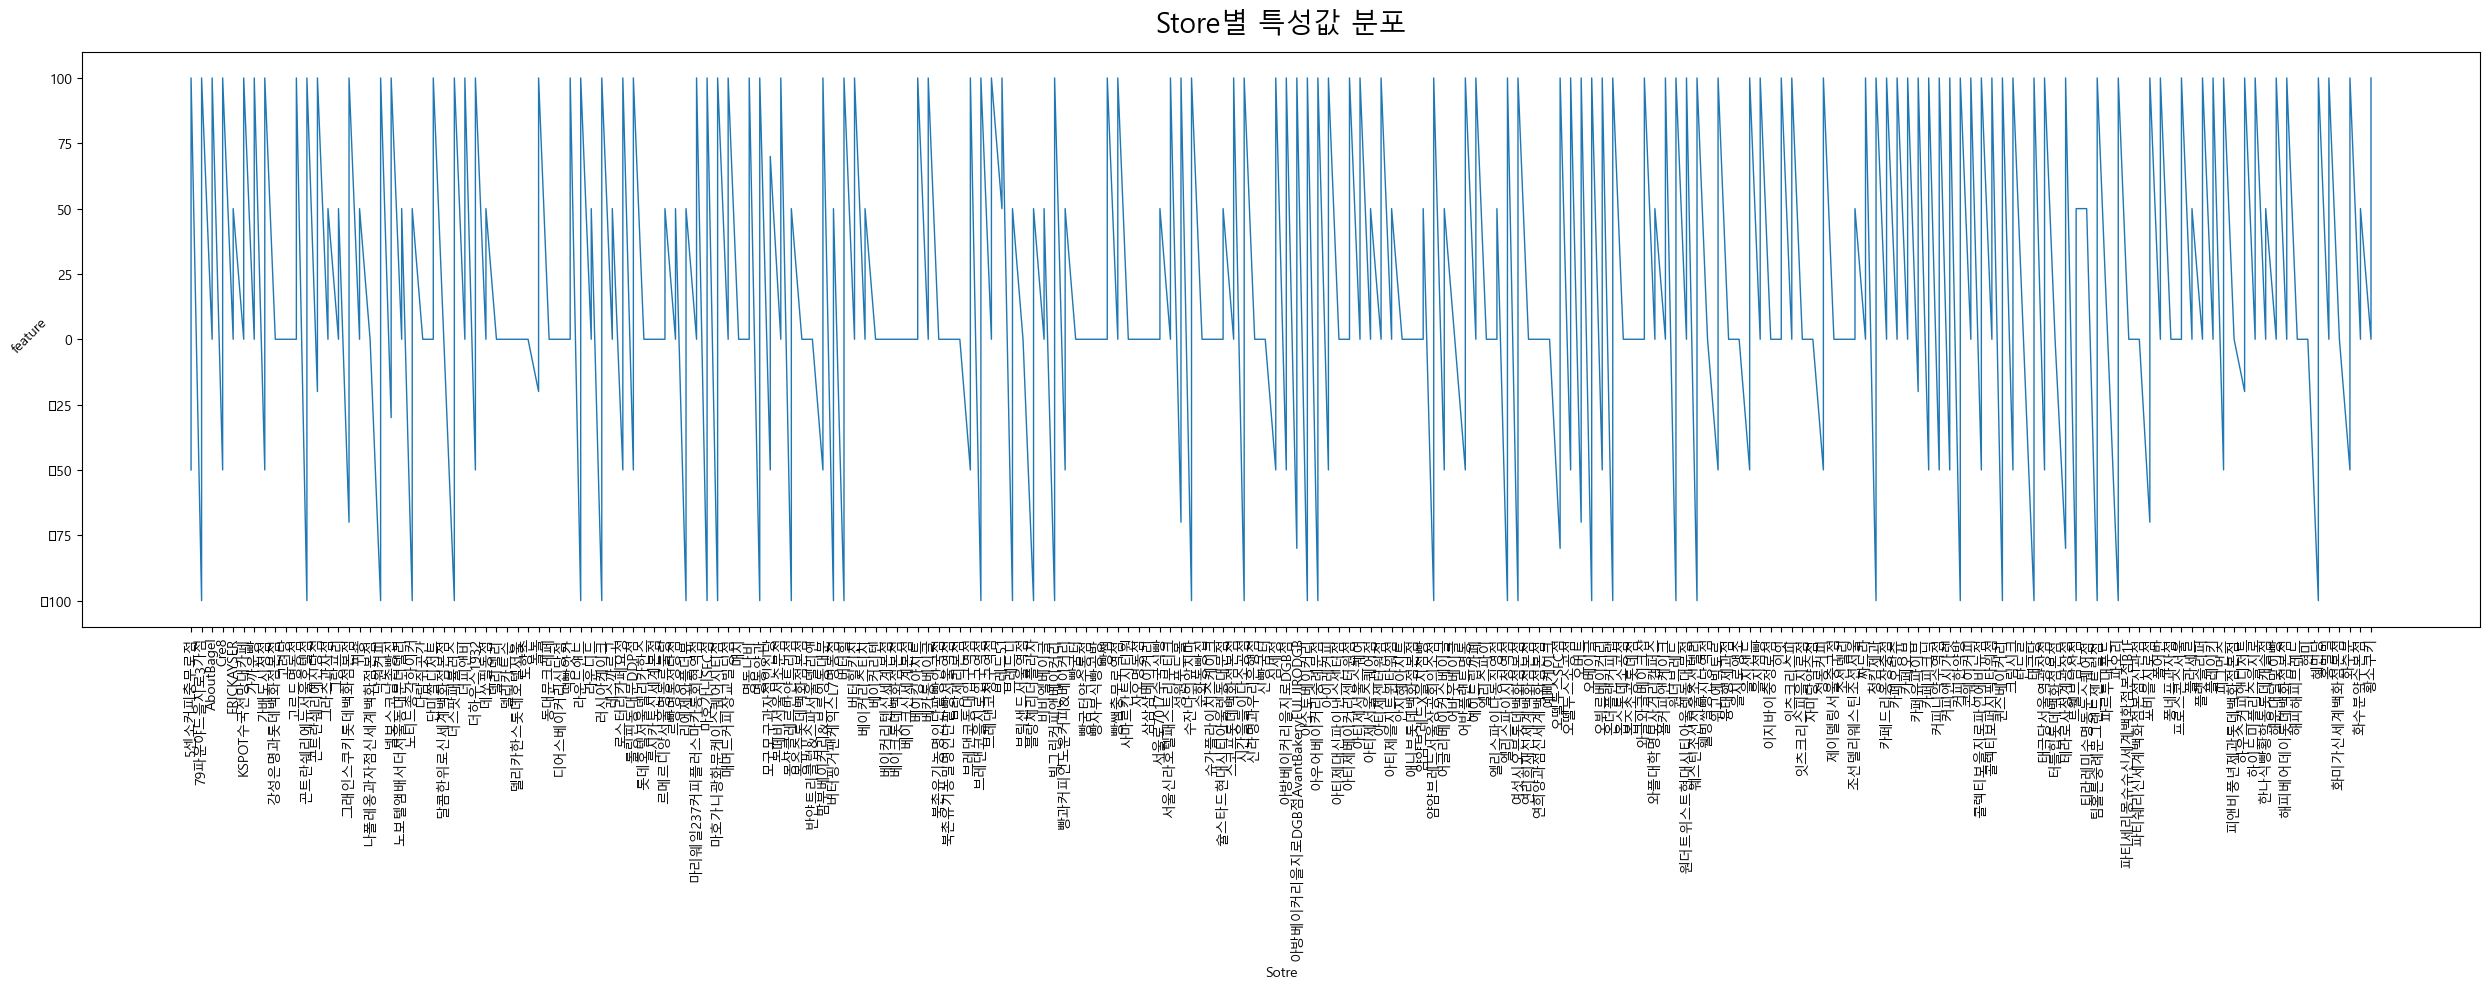

In [180]:
plt.figure(figsize=(25,10))
sns.lineplot(data=df, x='Store', y='beverage', estimator=None, lw=1)
plt.title('Store별 특성값 분포', fontsize=20, pad=15)
plt.xlabel('Sotre')
plt.ylabel('feature', rotation=45)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


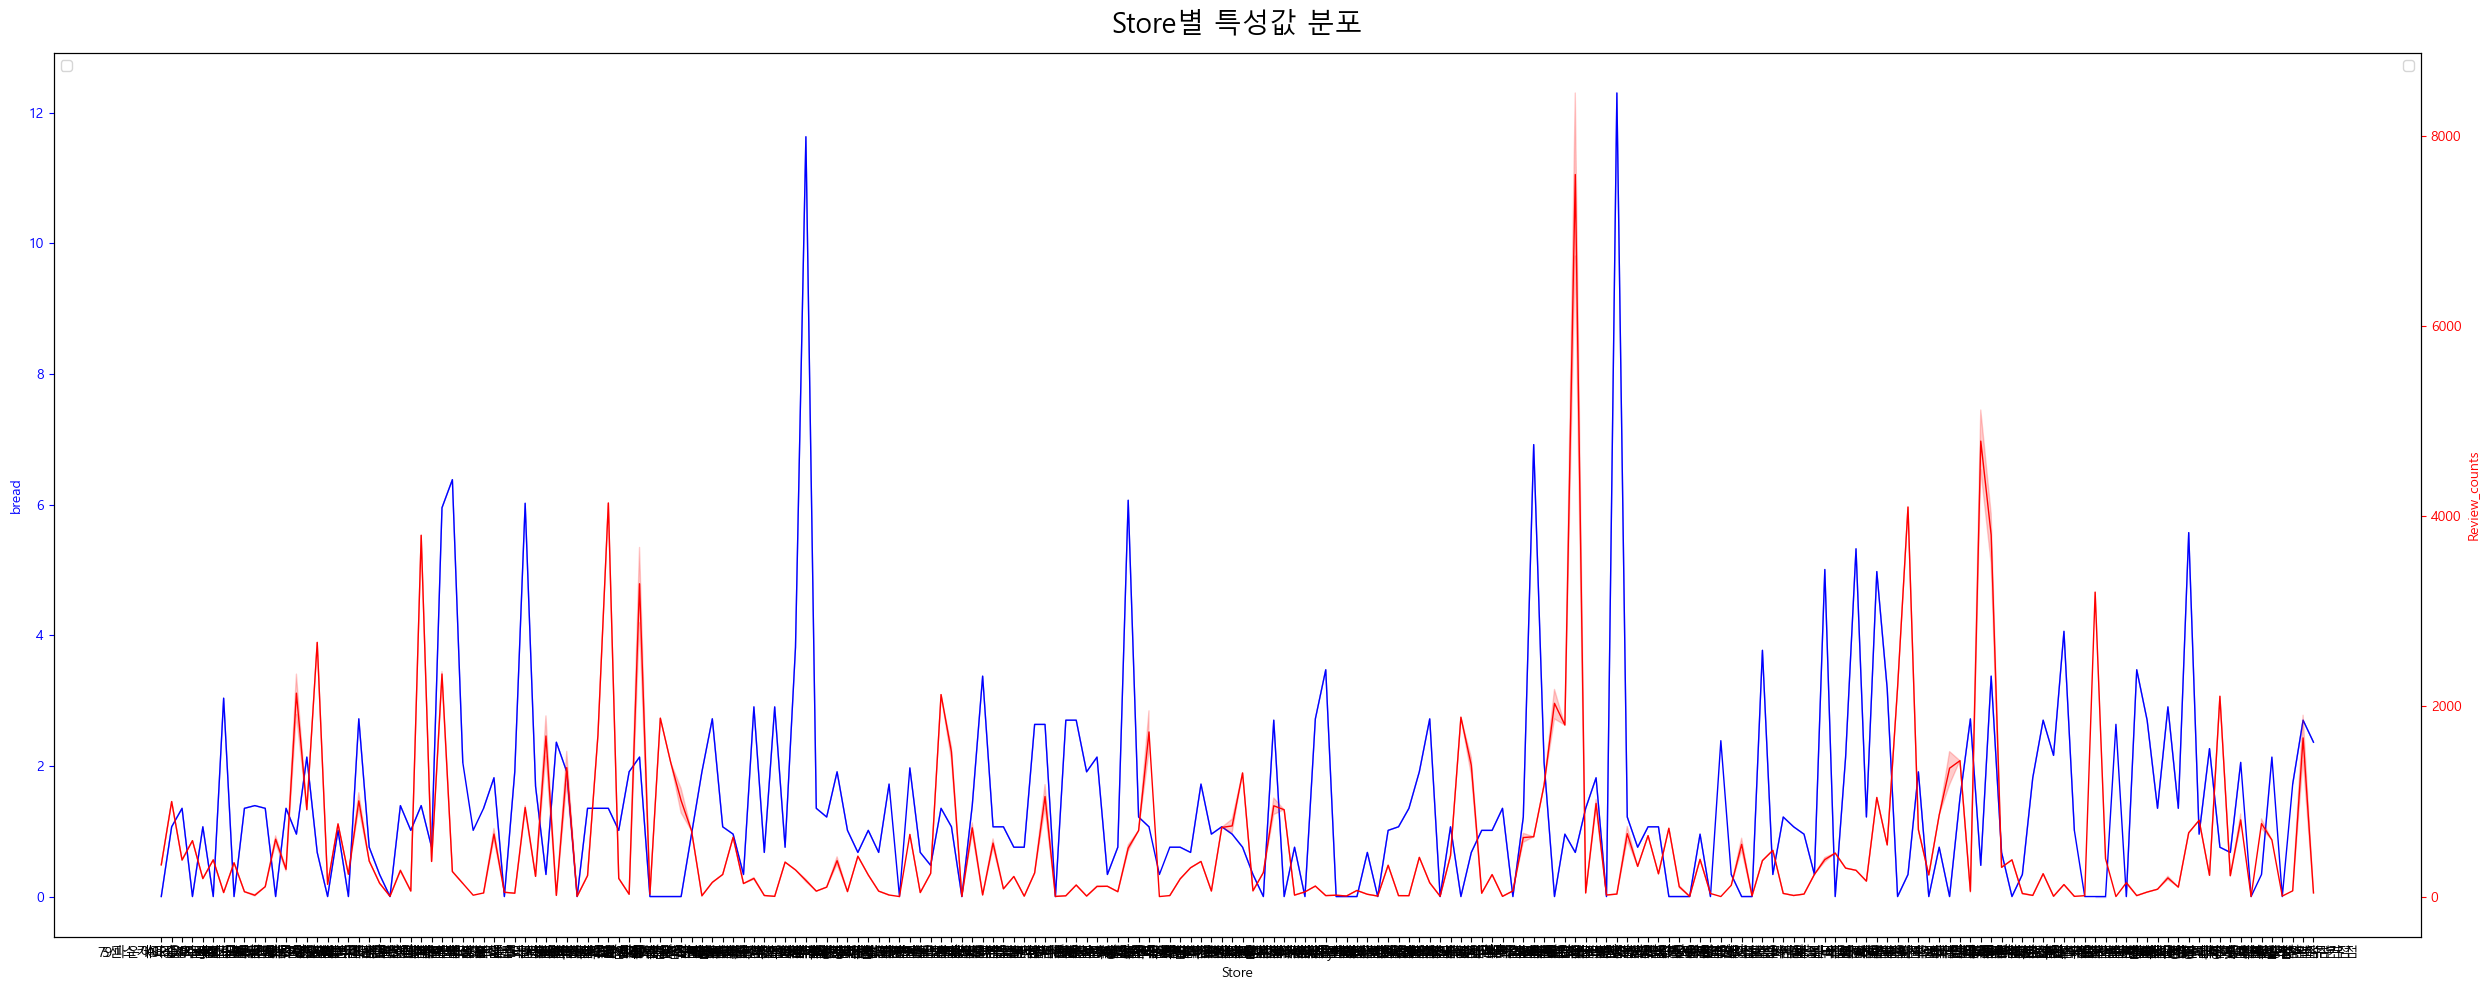

In [111]:
plt.figure(figsize=(25,10))

ax = sns.lineplot(data=df, x='Store', y='slope', color='blue', lw=1)
ax.set_title('Store별 특성값 분포', fontsize=20, pad=15)
ax.set_xlabel('Store')
ax.set_ylabel('bread', color = 'blue')
ax.tick_params(axis='y', colors = 'blue')

ax2 = ax.twinx()
sns.lineplot(data=df, x='Store', y='Review_counts', color='red', lw=1, ax=ax2)
ax2.set_ylabel('Review_counts', color = 'red')
ax2.tick_params(axis='y', colors='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 컬럼 상관관계 확인

In [208]:
#df_ver3_2 = df_ver3.drop(['Platform', 'Number', 'Store', 'Address', 'Review_text', 'ID', 'Date', 'Time', 'bread_name'], axis=1)
df_ver3_2 = df_ver3_2.drop(['Addr'], axis=1)
df_ver3_2

,Review_score,Review_counts,slope,bread,beverage,vegan,no_senior,no_kids,pet,whole_wheat,view,atmosphere,friendly,clean_store,restroom_clean,parking,spacious_store,plenty_seats,comfortable_seats,special_menu,photo,good_music,reservation_possible,unique_concept,beautiful_interior,price,wait,health,sentiment
0,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.3,334,0.00000,10.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.3,334,0.00000,0.0,-50.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,334,0.00000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.3,334,0.00000,10.0,0.0,0.0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,100,100,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15223,4.4,39,2.36245,100.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15224,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,1
15225,4.4,39,2.36245,50.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,1


<Axes: >

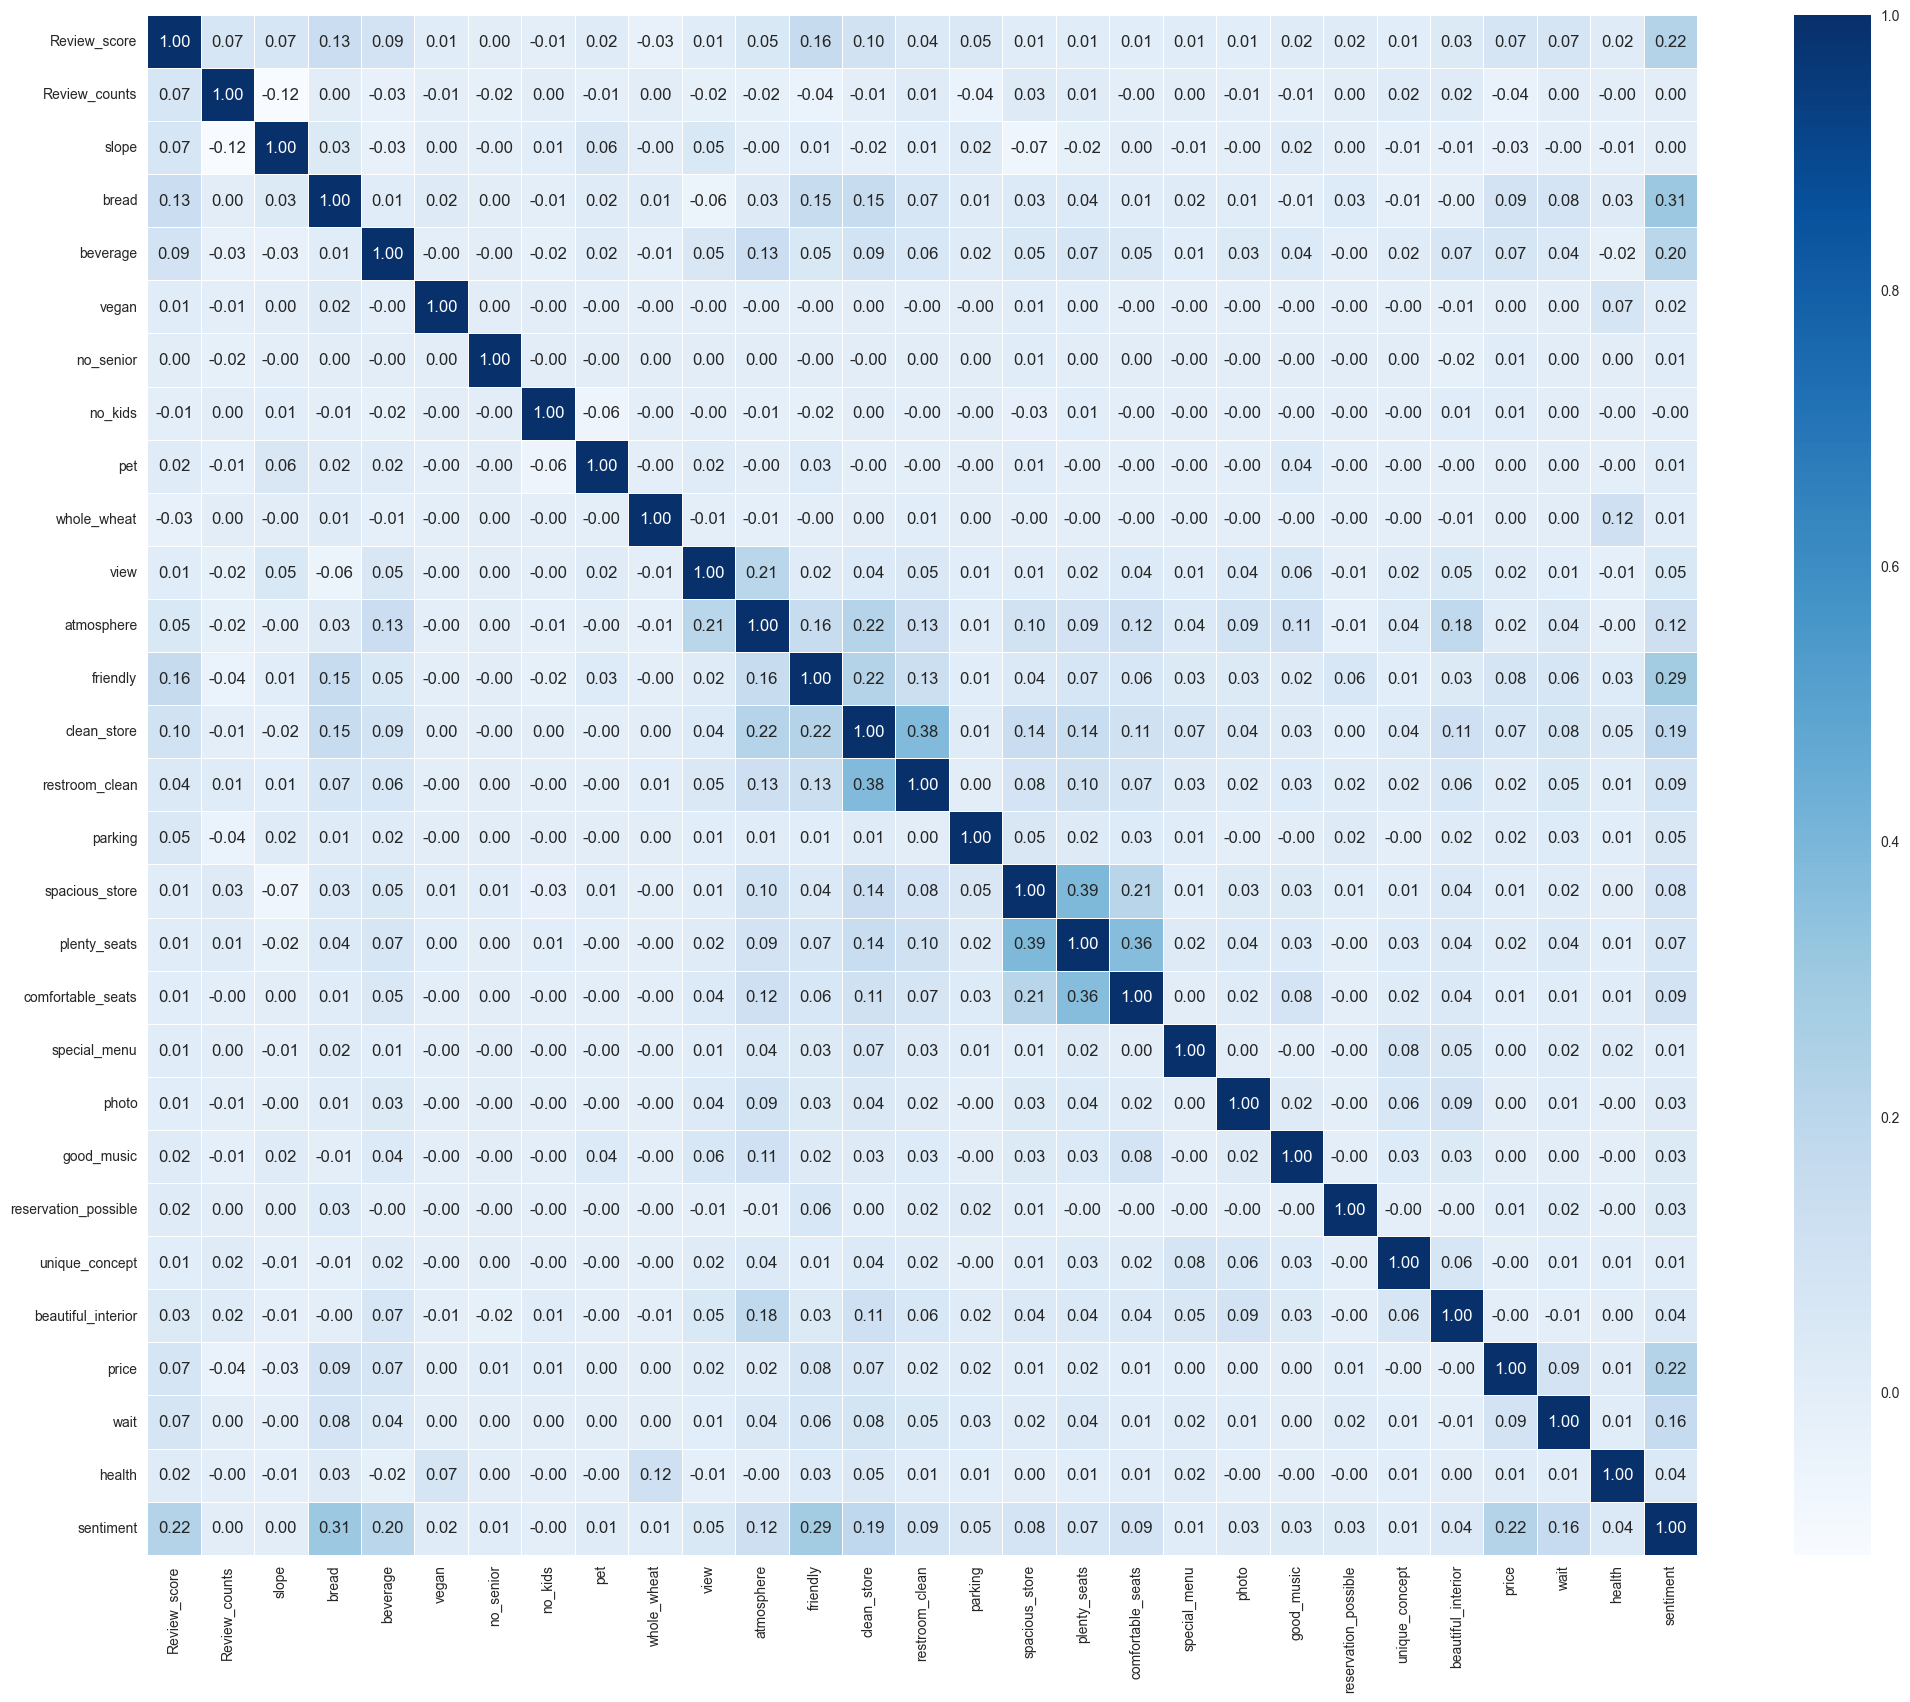

In [210]:
plt.figure(figsize=(25, 20))
sns.heatmap(data = df_ver3_2.corr(), annot=True, fmt= '.2f', linewidths=.5, cmap='Blues')

### 특성별 정규분포 확인

((array([-3.91330934, -3.69373542, -3.57343686, ...,  3.57343686,
          3.69373542,  3.91330934]),
  array([-100., -100., -100., ...,  100.,  100.,  100.])),
 (22.360459259968408, 12.556642805542781, 0.7715409348060587))

c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\jeong hee lee\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


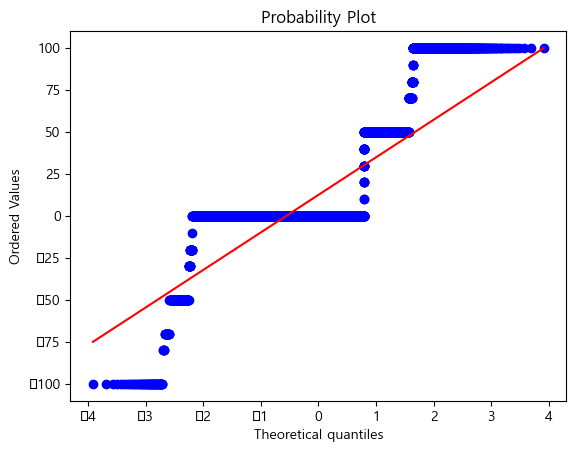

In [88]:
stats.probplot(df['beverage'], dist="norm", plot=plt)

In [132]:
# p값이 0.05보다 낮다 → 귀무 가설 기각(=유의미한 차이가 있다.)
shapiro_test = stats.shapiro(df_ver3['slope'])
print(shapiro_test)
#print('Statistics=%.3f, p=%.3f' % (stat, p))

ShapiroResult(statistic=0.7328909031039205, pvalue=4.155739411490679e-93)
